In [2]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [19]:
enso_array = np.full((12,6), np.nan)
sams_array = np.full((12,6), np.nan)

In [3]:
# website    https://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02135/seaice_analysis/

ext_df = pd.read_excel('../data/nsidc/Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0.xlsx',sheet_name='SH-Extent')

ext_df = ext_df[np.isin(ext_df['Unnamed: 0'], np.arange(1980,2022))]

ext_df.set_index('Unnamed: 0',inplace=True)

ext_df.head()

,January,February,March,April,May,June,July,August,September,October,November,December,Unnamed: 13,Annual
Unnamed: 0,,,,,,,,,,,,,,
1980,4.562,2.818,3.295,5.405,8.857,12.490,15.564,17.805,18.817,18.568,16.133,10.156,NaN,11.230
1981,4.412,2.873,3.392,5.838,9.355,13.109,16.039,17.737,18.597,18.294,16.111,10.895,NaN,11.435
1982,5.260,3.129,4.288,7.723,10.758,13.417,15.872,17.789,18.353,17.789,15.537,9.216,NaN,11.640
1983,4.770,3.070,4.016,6.470,9.526,12.643,15.467,17.251,18.585,17.915,16.014,10.394,NaN,11.389
1984,4.779,2.677,3.612,6.422,9.748,13.231,16.395,17.928,18.171,17.573,16.134,10.473,NaN,11.454


In [4]:
sam_df = pd.read_csv('../data/climate_indexes/SAM.csv',delim_whitespace=True)

sam_df = sam_df[np.isin(sam_df['YEAR'], np.arange(1980,2022))]

sam_df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
23,1980,0.01,-1.75,-2.58,-1.77,-0.51,3.19,-1.68,-1.68,-2.56,0.45,-2.09,-0.10
24,1981,0.84,1.76,-2.47,-3.52,0.88,0.38,-1.43,-1.99,-1.49,-0.39,2.34,2.21
25,1982,-0.77,0.70,4.28,2.89,-0.70,2.40,0.01,1.00,1.56,-2.14,-2.32,-2.21
26,1983,-2.44,0.89,-0.71,-0.60,-0.68,0.38,1.63,0.09,-0.72,2.05,3.79,1.52
27,1984,-1.96,-1.74,-0.38,-0.23,-0.33,1.08,-0.21,-2.33,-0.16,1.06,0.34,-3.22


In [20]:
sams_array.shape

(12, 6)

In [71]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

for count, month in enumerate(months):
    
    extents = ext_df[month]
    sams = sam_df[month[:3].upper()]
    

    
    reg = linregress(sams,extents)
    
    if reg[3] < 0.05:
        sams_array[count,0] = reg[2]

In [6]:
enso_df = pd.read_csv('../data/climate_indexes/ENSO.csv',
                      delim_whitespace=True)

enso_monthly_list = []

for mon, name in zip(range(1,13),calendar.month_name[1:]):
    
    subset = enso_df[enso_df['MON'] == mon][['YR','NINO3.4']]
    
    subset.columns = ['Year', name]
    
    subset.set_index('Year',inplace=True)
    
    enso_monthly_list.append(subset)

enso_monthly_df = enso_monthly_list[0]

for i in enso_monthly_list[1:]:
    
    enso_monthly_df = pd.merge(enso_monthly_df,i,how='inner',left_index=True,right_index=True)
    
enso_monthly_df.tail()

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2017,26.30,26.83,27.44,28.17,28.30,28.10,27.58,26.85,26.44,26.40,25.91,25.72
2018,25.87,26.06,26.50,27.31,27.77,27.86,27.52,27.18,27.10,27.63,27.69,27.54
2019,27.24,27.44,28.21,28.53,28.63,28.31,27.72,27.05,26.75,27.28,27.28,27.08
2020,27.08,27.09,27.70,28.22,27.67,27.44,27.15,26.38,26.12,25.64,25.59,25.66
2021,25.67,25.87,26.69,27.24,27.56,27.67,27.11,26.62,26.49,26.00,25.97,25.60


In [72]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

for count, month in enumerate(months):
    
    extents = ext_df[month][ext_df.index > 1981]
    sams = enso_monthly_df[month]
    
    reg = linregress(sams,extents)
    
    if reg[3] < 0.05:

        enso_array[count,0] = reg[2]

In [82]:
regions = ['Weddell','Ross','Bell-Amundsen','Indian','Pacific']

for region_counter, region in enumerate(regions,1):
    
    df = pd.read_excel('../data/nsidc/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx',
                       sheet_name=f'{region}-Extent-km^2')

    for count, month in enumerate(calendar.month_name[1:14]):
        
        # Correlate with ENSO
        
        exts = np.array(df[df['Unnamed: 0'].between(1982,2021)][month]).astype(np.float32)
        
        enso = np.array(enso_monthly_df[month]).astype(np.float32)
        
        reg = linregress(exts[~np.isnan(exts)],enso[~np.isnan(exts)])
        
        if reg[3]<0.05:
  
            enso_array[count,region_counter] = reg[2]
    
            print('ENSO', region, month, reg[2], reg[3])
        

        # Correlate with SAM
        
        
        exts = np.array(df[df['Unnamed: 0'].between(1980,2021)][month]).astype(np.float32)
        
        sam = np.array(sam_df[month[:3].upper()]).astype(np.float32)
        
        reg = linregress(exts[~np.isnan(exts)],sam[~np.isnan(exts)])
        
        if reg[3]<0.05:

            sams_array[count,region_counter] = reg[2]
            
            print('SAM', region, month, reg[2], reg[3])

#         break
        
#     break

    

SAM Weddell March 0.33512375042206755 0.030046721142218947
SAM Weddell September -0.3918431661472924 0.01027791769012043
ENSO Ross May -0.3339545869454798 0.03520234719384928
ENSO Ross June -0.32551309764345837 0.04039960439166298
ENSO Ross July -0.3185087357575048 0.045171462364120805
ENSO Ross August -0.5620218390129497 0.00016070408894484987
ENSO Ross September -0.4450593128196844 0.0040069750579905085
SAM Ross September -0.41206156074757183 0.006697772928598645
ENSO Ross October -0.4559567549596607 0.003108079922648383
ENSO Ross November -0.5777666949568322 9.466565195763887e-05
SAM Ross November 0.3089640280216604 0.046492275396817294
ENSO Ross December -0.4527255327644063 0.003804725165704297
SAM Ross December 0.4444638015326443 0.003598746732287362
ENSO Bell-Amundsen July 0.48507829484908643 0.0015118448691387144
ENSO Bell-Amundsen August 0.39481719272080634 0.011694802804953195
ENSO Bell-Amundsen September 0.3212945850961282 0.04322167151294638
ENSO Indian January -0.4450178305

In [77]:
imshow_regions = ['All', 'Weddell', 'Ross', 'B-A', 'Indian', 'Pacific']
imshow_months = [m[:3] for m in list(calendar.month_name[1:14])]


/tmp/ipykernel_41168/4100211341.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(imshow_months)


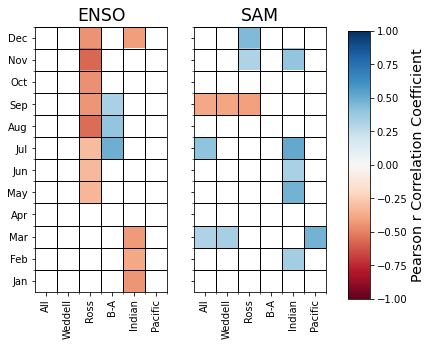

In [78]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(6,6))

im = ax1.imshow(enso_array,cmap='RdBu',vmin=-1,vmax=1)

ax2.imshow(sams_array,cmap='RdBu',vmin=-1,vmax=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.18, 0.05, 0.62])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label('Pearson r Correlation Coefficient',fontsize='x-large')

ax1.set_yticklabels(imshow_months)

for ax in [ax1,ax2]:
    ax.set_xticks(range(0,6))
    ax.set_yticks(range(0,13))
    ax.set_xticklabels(imshow_regions,rotation=90)

    ax.set_xticks(np.arange(0.5,6,1),minor=True)
    ax.set_yticks(np.arange(0.5,12,1),minor=True)
    ax.set_ylim(-0.5,11.5)
    ax.grid(which='minor', color='k', linestyle='-', linewidth=1)
        
ax2.set_yticklabels([])

ax1.set_title('ENSO', fontsize='xx-large')
ax2.set_title('SAM', fontsize='xx-large')

data_dir = '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs'

plt.savefig(f"{data_dir}/fig_enso_sam.png",dpi=500, bbox_inches='tight')

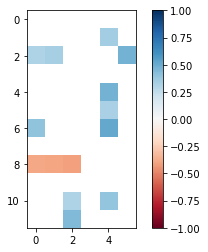

In [37]:

plt.imshow(sams_array,cmap='RdBu',vmin=-1,vmax=1)
plt.colorbar()

In [ ]:
/home/robbie/Dropbox/book_chapter/data/nsidc/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx